In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('scholarship.csv')

In [4]:
df.shape

(1000, 3)

In [5]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [6]:
df.isna().sum()

semester_percentage       0
scholarship_exam_marks    0
got_scholarship           0
dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12200\4232473137.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_marks'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12200\4232473137.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['semester_percentage'])


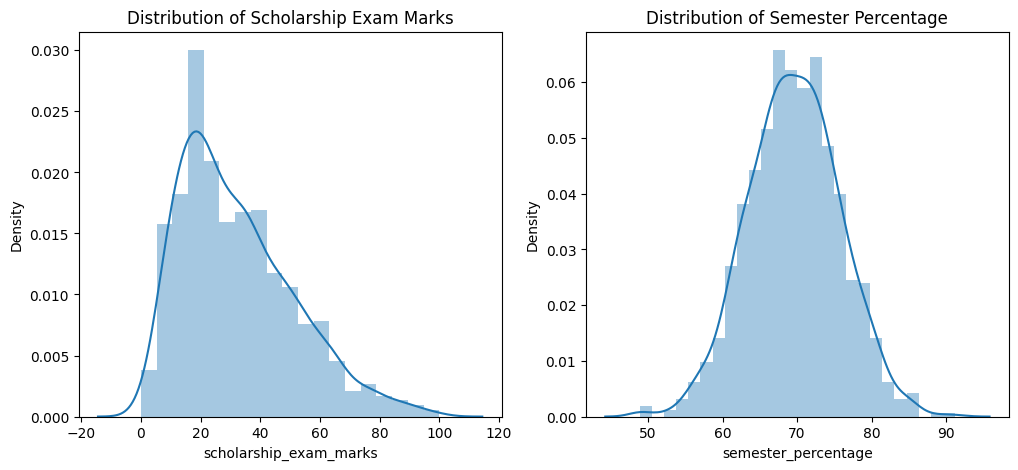

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.distplot(df['scholarship_exam_marks'])
plt.title('Distribution of Scholarship Exam Marks')

plt.subplot(1, 2, 2)
sns.distplot(df['semester_percentage'])
plt.title('Distribution of Semester Percentage')

plt.show()


In [8]:
mean_value = df['semester_percentage'].mean()
sd_value = df['semester_percentage'].std()

In [9]:
print(mean_value,',',sd_value)

69.6124 , 6.158978751323897


In [10]:
lower_value = mean_value - (3*sd_value)
upper_value = mean_value + (3*sd_value)

In [11]:
df[(df['semester_percentage']<lower_value ) | (df['semester_percentage'] >upper_value)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


In [27]:
df[(df['semester_percentage']>lower_value ) & (df['semester_percentage'] <upper_value)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


In [13]:
df["z_score"] = (df['semester_percentage']-df['semester_percentage'].mean())/df['semester_percentage'].std()

In [14]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


In [15]:
df[(df['z_score']>-3 ) & (df['z_score'] <3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


In [16]:
df[(df['z_score']>3) | (df['z_score']<-3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [17]:
df[(df['z_score']>-3 ) & (df['z_score'] <3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


## Capping 

In [25]:
df['semester_percentage']= np.where(df['semester_percentage']>upper_value,upper_value,
np.where(df['semester_percentage']<lower_value,lower_value,df['semester_percentage']))

In [26]:
df[(df['semester_percentage']<lower_value ) | (df['semester_percentage'] >upper_value)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
